In [1]:
import sys 
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Clearvale/jake_scripts/Amy_flywheel_scripts/')

import numpy as np
import pandas as pd

from scipy.stats import spearmanr, pearsonr
from scipy import stats
from scipy.spatial import distance
import math
import networkx as nx
import numpy as np
from igraph import *
from scipy.stats import zscore

In [2]:
auc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/group_mvpa_auc/operation_mvpa_auc_n55.csv')
# Assuming your DataFrame is named 'auc'
auc.rename(columns=lambda col: 'SubID' if col == 'subject' else f"{col}_acc", inplace=True)
auc.drop('all_acc', axis=1, inplace=True)

In [3]:
z_data = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/ClearMem_Z_Average.csv')
z_data = z_data[['SubID', 'z_ave', 'PSWQ_total', 'WBSI_total', 'RRS_total', 'RRS_depression', 'RRS_brooding', 'RRS_reflection']]
z_data = z_data.dropna()
z_data = pd.merge(auc, z_data, on='SubID')


from scipy.stats import zscore
z_data['br_z_ave'] = z_data['z_ave']
z_data.drop('z_ave', axis=1, inplace=True)
z_data['b_z_ave'] = (zscore(z_data['PSWQ_total']) + zscore(z_data['WBSI_total']) + zscore(z_data['RRS_brooding']))/3
z_data['brd_z_ave'] = (zscore(z_data['PSWQ_total']) + zscore(z_data['WBSI_total']) + zscore(z_data['RRS_brooding']) + zscore(z_data['RRS_reflection']) + zscore(z_data['RRS_depression']))/5

#all_metrics_z= z_data.drop(['PSWQ_total', 'WBSI_total','RRS_total', 'RRS_depression', 
#                     'RRS_brooding', 'RRS_reflection', 'br_z_ave'], axis=1)

z_data['PSWQ_total'] = zscore(z_data['PSWQ_total'])
z_data['WBSI_total'] = zscore(z_data['WBSI_total'])
z_data['RRS_brooding'] = zscore(z_data['RRS_brooding'])

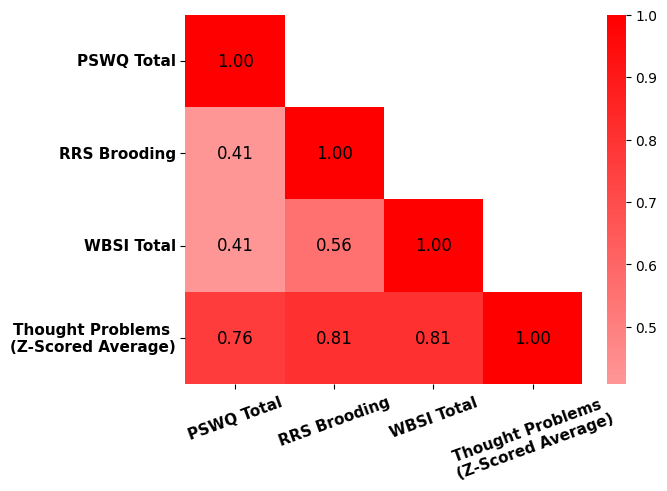

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data
cor_data = z_data[['PSWQ_total', 'RRS_brooding', 'WBSI_total', 'b_z_ave']]
cor_data.columns = ['PSWQ Total', 'RRS Brooding', 'WBSI Total', 'Thought Problems (Z-Scored Average)']
cor_data = cor_data.corr(method='spearman')

# Create the mask to hide the upper triangle including diagonal
mask = np.triu(np.ones_like(cor_data, dtype=bool), k=1)  # Setting k=1 excludes the diagonal

# Create the heatmap
ax = sns.heatmap(cor_data, annot=False, cmap='bwr', center=0, cbar_kws={"shrink": 1}, mask=mask)

# Customize the annotations
for i in range(len(cor_data)):
    for j in range(len(cor_data.columns)):
        if i >= j:
            text = ax.text(
                j + 0.5, i + 0.5,
                f'{cor_data.iloc[i, j]:.2f}',
                ha='center', va='center', fontsize=12, color='black'
            )

ax.set_xticklabels([label.get_text().replace('(Z-Scored Average)', '\n(Z-Scored Average)').replace('_', ' ') for label in ax.get_xticklabels()], fontsize=11, fontweight='bold', rotation=20)

ax.set_yticklabels([label.get_text().replace('(Z-Scored Average)', '\n(Z-Scored Average)')
                     .replace('_', ' ') for label in ax.get_yticklabels()], fontsize=11, fontweight='bold')

# Save the figure
output_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/behavioral_correlations.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [5]:
/pl/active/banich/studies/Clearvale/scripts/jake_scripts/clearmem_processing/

NameError: name 'pl' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data
cor_data = z_data[['PSWQ_total', 'RRS_brooding', 'WBSI_total', 'b_z_ave']]
cor_data.columns = ['PSWQ Total', 'RRS Brooding', 'WBSI Total', 'Thought Problems (Z-Scored Average)']
cor_data = cor_data.corr(method='spearman')

# Create the mask to hide the upper triangle including diagonal
mask = np.triu(np.ones_like(cor_data, dtype=bool), k=1)  # Setting k=1 excludes the diagonal

# Create the heatmap
ax = sns.heatmap(cor_data, annot=False, cmap='bwr', center=0, cbar_kws={"shrink": 1}, mask=mask)



ax.set_xticklabels([label.get_text().replace('(Z-Scored Average)', '\n(Z-Scored Average)').replace('_', ' ') for label in ax.get_xticklabels()], fontsize=11, fontweight='bold', rotation=20)

ax.set_yticklabels([label.get_text().replace('(Z-Scored Average)', '\n(Z-Scored Average)')
                     .replace('_', ' ') for label in ax.get_yticklabels()], fontsize=11, fontweight='bold')

# Save the figure
output_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/behavioral_correlations_no_annot.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

In [ ]:
cor_data = z_data[['PSWQ_total', 'RRS_brooding', 'WBSI_total']]
cor_data.columns = ['PSWQ Total', 'RRS Brooding', 'WBSI Total']
covariance_matrix = cor_data.cov().round(3)

covariance_matrix 

In [ ]:
# Create the mask to hide the upper triangle including diagonal
mask = np.triu(np.ones_like(covariance_matrix, dtype=bool), k=1)  # Setting k=1 excludes the diagonal

# Create the heatmap
ax = sns.heatmap(covariance_matrix, annot=False, 
                 cmap="coolwarm", cbar_kws={"shrink": 1}, mask=mask, center=0)

# Customize the annotations
for i in range(len(covariance_matrix)):
    for j in range(len(covariance_matrix.columns)):
        if i >= j:
            text = ax.text(
                j + 0.5, i + 0.5,
                f'{covariance_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', fontsize=16, color='black'
            )

ax.set_xticklabels([label.get_text().replace('(Z-Scored Average)', '\n(Z-Scored Average)')
                    .replace('_', ' ') for label in ax.get_xticklabels()], fontsize=12, rotation=20)

ax.set_yticklabels([label.get_text().replace('(Z-Scored Average)', '\n(Z-Scored Average)')
                     .replace('_', ' ') for label in ax.get_yticklabels()], fontsize=12)

# Save the figure
output_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/behavioral_covs.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
# Brain Metrics 

In [ ]:
auc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/group_mvpa_auc/operation_mvpa_auc_n55.csv')
# Assuming your DataFrame is named 'auc'
auc.rename(columns=lambda col: 'SubID' if col == 'subject' else f"{col}_acc", inplace=True)
auc.drop('all_acc', axis=1, inplace=True)


z_data = pd.read_csv('/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/group_mvpa_auc/ClearMem_Z_Average.csv')

pd.merge(auc, z_data[['SubID', 'z_ave']], on='SubID').dropna().shape

In [ ]:
task_rsa_disp = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/data/rsa/dispersion_metrics_z.csv')

task_rsa_disp = task_rsa_disp.loc[:, ~task_rsa_disp.columns.str.endswith('_acc')]
task_rsa_disp = pd.merge(task_rsa_disp, auc, on ='SubID')

In [ ]:
#.merge(z_data, task_rsa_disp, on='SubID')

In [ ]:
task_fc_disp = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/data/task/dispersion_metrics_z.csv')
task_fc_disp = task_fc_disp.loc[:, ~task_fc_disp.columns.str.endswith('_acc')]
task_fc_disp = pd.merge(task_fc_disp, auc, on ='SubID')
task_fc_disp = pd.merge(task_fc_disp, task_rsa_disp.filter(regex='SubID|acc'), on='SubID')

In [ ]:
task_rsa = task_rsa_disp.filter(regex='SubID|dispersion|ecc|acc')
task_fc= task_fc_disp.filter(regex='SubID|dispersion|ecc')

task_rsa.columns = [col + '_rsa' if col != 'SubID' else col for col in task_rsa.columns]
task_fc.columns = [col + '_fc' if col != 'SubID' else col for col in task_fc.columns]

task_rsa.filter(regex='vn').filter(regex='disp').corr()

In [ ]:
task_rsa_fc = pd.merge(task_rsa, task_fc, on='SubID')

# Define the specific columns to rename
columns_to_rename = ['maintain_acc_rsa', 'replace_acc_rsa', 'suppress_acc_rsa', 'clear_acc_rsa']

# Create a dictionary for renaming
rename_dict = {col: col.replace('_rsa', '') for col in columns_to_rename}

# Rename the columns in the DataFrame
task_rsa_fc.rename(columns=rename_dict, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def vis_cors(correlation_matrix, annot=False, figsize=(14, 14), cbar=True, cluster=False, mask_type=None):
    """
    Visualize a correlation matrix as a heatmap or clustermap with color limits set from -1 to 1.
    
    Args:
        correlation_matrix: The correlation matrix to visualize.
        annot: Whether to annotate cells with correlation values.
        figsize: Tuple specifying the figure size.
        cbar: Whether to display the color bar.
        cluster: If True, display a clustermap; if False, display a heatmap.
        mask_type: 'lower' to show lower half, 'upper' to show upper half, or None to show the full matrix.
    """

    # Apply mask based on mask_type
    mask = None
    if mask_type == 'lower':
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
    elif mask_type == 'upper':
        mask = np.tril(np.ones_like(correlation_matrix, dtype=bool), k=-1)

    if cluster:
        # Create a clustermap with specified parameters
        g = sns.clustermap(
            correlation_matrix.round(2),
            cmap='bwr',
            center=0,
            annot=annot,
            annot_kws={"color": "black", "fontsize": figsize[0] / correlation_matrix.shape[0] * 10},
            figsize=figsize,
            cbar_pos=(0.3, 0.85, 0.4, 0.02) if cbar else None,
            cbar_kws={'orientation': 'horizontal'} if cbar else None,
            vmin=-1,  # Set minimum color limit
            vmax=1,   # Set maximum color limit
            mask=mask  # Apply the mask if provided
        )

        # Remove dendrogram labels
        g.ax_row_dendrogram.set_visible(False)
        g.ax_col_dendrogram.set_visible(False)

        # Remove tick marks while keeping the labels
        g.ax_heatmap.tick_params(axis='x', length=0)
        g.ax_heatmap.tick_params(axis='y', length=0)

        plt.show()

    else:
        # Create a heatmap with specified parameters
        plt.figure(figsize=figsize)
        sns.heatmap(
            correlation_matrix.round(2),
            mask=mask,  # Apply the mask if specified
            cmap='bwr',
            center=0,
            annot=annot,
            annot_kws={"color": "black", "fontsize": figsize[0] / correlation_matrix.shape[0] * 10},
            cbar=cbar,
            cbar_kws={'orientation': 'horizontal'} if cbar else None,
            vmin=-1,  # Set minimum color limit
            vmax=1    # Set maximum color limit
        )

        # Remove tick marks while keeping the labels
        plt.gca().tick_params(axis='x', length=0)
        plt.gca().tick_params(axis='y', length=0)

        plt.show()


In [ ]:
import pandas as pd

def filter_and_correlate(df, *keywords, use_and=False):
    """
    Filters the DataFrame based on multiple keywords and calculates the correlation matrix.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - *keywords: Variable number of string arguments to filter the columns.
    - use_and (bool): If True, filters based on AND condition; otherwise, uses OR condition.
    
    Returns:
    - pd.DataFrame: The correlation matrix of the filtered DataFrame.
    """
    # Drop the 'SubID' column if it exists
    filtered_df = df.drop(columns=['SubID'], errors='ignore')
    
    if use_and:
        # AND condition: Keep columns that contain ALL the keywords
        filtered_columns = [col for col in filtered_df.columns if all(keyword in col for keyword in keywords)]
    else:
        # OR condition: Keep columns that contain ANY of the keywords
        pattern = '|'.join(keywords)
        filtered_columns = filtered_df.filter(regex=pattern).columns
    
    # Filter the DataFrame to keep only the selected columns
    filtered_df = filtered_df[filtered_columns]
    
    # Calculate and return the correlation matrix
    return filtered_df.corr()

In [ ]:
# Get all column names
cols = task_rsa_fc.columns

# Define the order criteria
subid_col = [col for col in cols if col == 'SubID']
acc_cols = [col for col in cols if col.endswith('acc')]
dispersion_md_rsa_cols = [col for col in cols if col.endswith('dispersion_md_rsa')]
dispersion_md_fc_cols = [col for col in cols if col.endswith('dispersion_md_fc')]
eccentricity_rsa_cols = [col for col in cols if col.endswith('eccentricity_rsa')]
eccentricity_fc_cols = [col for col in cols if col.endswith('eccentricity_fc')]

# Combine all lists to form the desired order
new_order = (
    subid_col +
    acc_cols +
    dispersion_md_rsa_cols +
    dispersion_md_fc_cols +
    eccentricity_rsa_cols +
    eccentricity_fc_cols
)

# Reorder the DataFrame
task_rsa_fc = task_rsa_fc[new_order]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def vis_cors(correlation_matrix, annot=False, figsize=(16, 16), cbar=True, cluster=False, mask_type=None, square_size=4, labels=None, add_lines=False, save_path=None):
    """
    Visualize a correlation matrix as a heatmap or clustermap with color limits set from -1 to 1,
    overlay 4x4 white square outlines on the lower half, excluding the diagonal, and format tick labels.
    Additionally, add a line over the side (right edge) and bottom of the correlation matrix.

    Args:
        correlation_matrix: The correlation matrix to visualize.
        annot: Whether to annotate cells with correlation values.
        figsize: Tuple specifying the figure size.
        cbar: Whether to display the color bar.
        cluster: If True, display a clustermap; if False, display a heatmap.
        mask_type: 'lower' to show lower half, 'upper' to show upper half, or None to show the full matrix.
        square_size: The size of the square outlines (default is 4x4).
        labels: List of labels for the tick marks.
        add_lines: Whether to add 4x4 white square outlines (default is False).
        save_path: Path to save the output image (default is None).
    """

    # Apply mask based on mask_type
    mask = None
    if mask_type == 'lower':
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
    elif mask_type == 'upper':
        mask = np.tril(np.ones_like(correlation_matrix, dtype=bool), k=-1)

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        correlation_matrix.round(2),
        mask=mask,
        cmap='bwr',
        center=0,
        annot=annot,
        annot_kws={"color": "black", "fontsize": figsize[0] / correlation_matrix.shape[0] * 19},
        cbar=cbar,
        cbar_kws={'orientation': 'horizontal'} if cbar else None,
        vmin=-1, vmax=1
    )

    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0)

    # Apply 4x4 white squares in the lower half (excluding diagonal) if add_lines is True
    if add_lines:
        num_rows, num_cols = correlation_matrix.shape
        for i in range(square_size, num_rows, square_size):
            for j in range(0, i, square_size):
                rect = Rectangle((j, i), square_size, square_size, fill=False, edgecolor='black', lw=3)
                ax.add_patch(rect)

    # Add lines on the right edge and bottom of the correlation matrix
    num_rows, num_cols = correlation_matrix.shape
    ax.add_patch(Rectangle((0, 0), num_cols, num_rows, fill=False, edgecolor='white', lw=4))

    # Format tick labels if provided
    if labels is not None:
        formatted_labels = []
        for label in labels:
            label = label.replace('main_', 'maintain_')
            label = label.replace('rsa', 'RSA').replace('fc', 'FC')
            label = label.replace('vn', 'V\u1D42\u1D50').replace('smn', 'SM\u1D42\u1D50')
            label = label.replace('fpcn', 'FPC\u1D42\u1D50').replace('dmn', 'DM\u1D42\u1D50')
            label = label.replace('dispersion', 'disp.').replace('eccentricity', 'ecc.')
            label = label.replace('_md_', '_').replace('acc', 'acc.')
            label = label.replace('_', ' ')
            formatted_labels.append(label)

        # Set formatted labels
        ax.set_xticklabels(formatted_labels, rotation=45, ha='right', size=17)
        ax.set_yticklabels(formatted_labels, rotation=0, size=17)

    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, transparent=True, bbox_inches='tight')

    plt.show()


In [ ]:
for net, mask, out in zip(['acc|vn', 'acc|smn', 'acc|fpcn', 'acc|dmn'], 
                          ['lower', 'lower', 'lower', 'lower'],
                          ['vn', 'smn', 'fpcn', 'dmn']):
    
    labels = list(filter_and_correlate(task_rsa_fc, net, use_and=False).columns)
    save_path = f"/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/net_organization/{out}_cors.png"
    vis_cors(
        filter_and_correlate(task_rsa_fc, net, use_and=False), 
        annot=True, 
        cbar=False, 
        cluster=False,
        mask_type=mask,
        labels=labels,
        add_lines=True,
        save_path=save_path
    )


In [ ]:
for net, mask, out in zip(['rsa', 'fc'], 
                          ['lower','lower'],
                          ['rest_rsa', 'rest_fc']):
    
    labels = list(filter_and_correlate(task_rsa_fc, net, use_and=False).columns)
    save_path = f"/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/net_organization/{out}_cors.png"
    vis_cors(
        filter_and_correlate(task_rsa_fc, net, use_and=False), 
        annot=False, 
        cbar=False, 
        cluster=False,
        mask_type=mask,
        labels=labels,
        add_lines=True,
        save_path=save_path
    )


In [ ]:
# Load the data
rest_fc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/rest/rest_all_metrics_z.csv').drop('thought_problems', axis=1)
rest_rsa = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/rest/rest_rsa_all_metrics_z.csv').drop('thought_problems', axis=1)

# Modify the column names in rest_rsa
rest_rsa.columns = rest_rsa.columns.str.replace('_rsa_', '_')

# Rename the columns in rest_fc: remove 'rest_' and add '_FC' to the end, excluding specific columns
rest_fc.columns = [
    col.replace('rest_', '') + '_FC' if col not in ['SubID', 'thought_problems'] else col
    for col in rest_fc.columns
]

# Rename the columns in rest_rsa: remove 'rest_' and add '_FC' to all columns
rest_rsa.columns = [
    col.replace('rest_', '') + '_RSA' if col not in ['SubID', 'thought_problems'] else col
    for col in rest_rsa.columns
]

rest = pd.merge(rest_rsa, rest_fc, on='SubID')

In [ ]:
labels = list(filter_and_correlate(rest, 'FC', 'RSA', use_and=False).columns)
out = 'rest'
mask='lower'
save_path = f"/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/net_organization/{out}_cors.png"
vis_cors(
    filter_and_correlate(rest, 'FC', 'RSA', use_and=False), 
    annot=True, 
    cbar=False, 
    cluster=False,
    mask_type=mask,
    labels=labels,
    add_lines=True,
    save_path=save_path
)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def vis_cors(correlation_matrix, annot=False, figsize=(14, 14), cbar=True, cluster=False, mask_type=None, square_size=4, labels=None, add_lines=False):
    """
    Visualize a correlation matrix as a heatmap or clustermap with color limits set from -1 to 1,
    overlay 4x4 white square outlines on the lower half, excluding the diagonal, and format tick labels.
    Additionally, add a line along the edge of the visible portion of the matrix based on mask_type.

    Args:
        correlation_matrix: The correlation matrix to visualize.
        annot: Whether to annotate cells with correlation values.
        figsize: Tuple specifying the figure size.
        cbar: Whether to display the color bar.
        cluster: If True, display a clustermap; if False, display a heatmap.
        mask_type: 'lower' to show lower half, 'upper' to show upper half, or None to show the full matrix.
        square_size: The size of the square outlines (default is 4x4).
        labels: List of labels for the tick marks.
        add_lines: Whether to add 4x4 white square outlines (default is False).
    """

    # Apply mask based on mask_type
    mask = None
    if mask_type == 'lower':
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0)
    elif mask_type == 'upper':
        mask = np.tril(np.ones_like(correlation_matrix, dtype=bool), k=0)

    # Plot heatmap
    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        correlation_matrix.round(2),
        mask=mask,
        cmap='bwr',
        center=0,
        annot=annot,
        annot_kws={"color": "black", "fontsize": figsize[0] / correlation_matrix.shape[0] * 6},
        cbar=cbar,
        cbar_kws={'orientation': 'horizontal'} if cbar else None,
        vmin=-1, vmax=1
    )

    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0)

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right', size=12)
    plt.yticks(size=12)

    # Apply 4x4 white squares in the lower half (excluding diagonal) if add_lines is True
    if add_lines:
        num_rows, num_cols = correlation_matrix.shape
        for i in range(square_size, num_rows, square_size):
            for j in range(0, i, square_size):
                rect = Rectangle((j, i), square_size, square_size, fill=False, edgecolor='black', lw=3)
                ax.add_patch(rect)

    # Ensure everything fits within the figure
    plt.tight_layout()
    plt.show()


In [ ]:
# Define a function to format labels
def format_labels(labels):
    formatted_labels = []
    for label in labels:
        label = label.replace('main_', 'maintain_')
        label = label.replace('rsa', 'RSA').replace('fc', 'FC')
        label = label.replace('vn', 'VN').replace('smn', 'SMN')
        label = label.replace('fpcn', 'FPCN').replace('dmn', 'DMN')
        label = label.replace('dispersion', 'disp.').replace('eccentricity', 'ecc.')
        label = label.replace('_md_', '_').replace('acc', 'acc.') 
        label = label.replace('_', ' ')
        formatted_labels.append(label)
    return formatted_labels

In [ ]:
# Filter and get correlation matrices
rsa_acc_cors = filter_and_correlate(task_rsa_fc, 'rsa', 'acc', use_and=False).iloc[:, :4]
fc_acc_cors = filter_and_correlate(task_rsa_fc, 'fc', 'acc', use_and=False).iloc[:, :4]

# Define the sorting function for labels
def get_sort_keys(label):
    network_order = ['acc', 'vn', 'smn', 'fpcn', 'dmn']
    network_key = next((network for network in network_order if f"{network}" in label), "")
    measurement_key = 'dispersion' if 'dispersion' in label else 'eccentricity'
    return (network_order.index(network_key), measurement_key)

# Sort columns
rsa_sorted_columns = sorted(rsa_acc_cors.T.columns, key=get_sort_keys)
fc_sorted_columns = sorted(fc_acc_cors.T.columns, key=get_sort_keys)

In [ ]:
rsa_mat = rsa_acc_cors.loc[rsa_sorted_columns, :]
rsa_mat.index =  format_labels(rsa_sorted_columns)
rsa_mat.columns = format_labels(rsa_acc_cors.columns)

# Updated RSA plot with formatted labels
vis_cors(
    rsa_mat, 
    annot=True, 
    figsize=(2, 13), 
    cbar=False, 
    cluster=False
)


fc_mat = fc_acc_cors.loc[fc_sorted_columns, :]
fc_mat.index =  format_labels(fc_sorted_columns)
fc_mat.columns = format_labels(fc_acc_cors.columns)
## Updated RSA plot with formatted labels
vis_cors(
    fc_mat, 
    annot=True, 
    figsize=(3.6, 13), 
    cbar=False, 
    cluster=False
)

In [ ]:
# get cors for within each network by metric / datatype
# get cors for across each network by metric across datattype
# also need to correlate with AUC - so include those in each one...